<a href="https://colab.research.google.com/github/enjolimarie/Projects-in-AI-ML/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset selection:


In your project, you will pick a dataset (not the same as in the previous homeworks) and
describe the problem you would like to solve (classification or regression). Include a link to the
dataset source. It is highly recommended that you pick a dataset with at least 10,000 (or more
observations). There are many ways of describing a big dataset and one way to describe it is – a
big dataset is more complex. Complexity can refer to the number of observations, features, or
the type of data. For this project, there is no restriction on the number of features your dataset
has. However, having more features gives you greater ability to apply the techniques discussed
in class.

## Chosen Dataset and Why:
The dataset I am using is provided at this link: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud.

This dataset contains detailed information on credit card transactions, including features that can help identify fraudulent activity. Credit card fraud is a huge problem that affects many people and organizations, resulting in financial losses and diminishing trust in online transactions. As I have had my own personal experiences with credit card fraud it becomes a very appealing topic to investigate. The goal of this assignment is to build a classification model that accurately detects credit card fraud.



## Part 1 (50 points)

In this part you will implement a neural network from scratch. You cannot use any existing
Deep Learning Framework. You can utilize NumPy and Pandas libraries to perform efficient
calculations. Refer to Lecture 5 slides for details on computations required.
Write a Class called NeuralNetwork that has at least the following methods (you are free to add
your own methods too):

a. Initialization method.

b. Forward propagation method that performs forward propagation calculations.

c. Backward propagation method that implements the backpropagation algorithm
discussed in class.

d.Train method that includes the code for gradient descent.

e. Cost method that calculates the loss function.

f. Predict method that calculates the predictions for the test set.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class NeuralNetwork:
    # a. Initialization method
    def __init__(self, layers, learning_rate=0.01, seed=42):
        np.random.seed(seed)
        self.layers = layers
        self.learning_rate = learning_rate
        self.params = {}
        # Initialize weights and biases for each layer (from 1 to l)
        for l in range(1, len(layers)):
            self.params["W" + str(l)] = np.random.randn(layers[l-1], layers[l]) * 0.01
            self.params["b" + str(l)] = np.zeros((1, layers[l]))

    # b. Forward propagation method
    def forward(self, X):
        # X is the input data of shape (m, n_input), where m is the number of examples

        # cache is the dictionary that contains values Z and A for each layer
        # which will be needed for backpropagation
        # Store the input as activation 0
        cache = {"A0": X}
        # A is the output of the network after the activation function on the final layer
        A = X
        # Number of layers excluding the input layer
        L = len(self.layers) - 1
        for l in range(1, L + 1):
            W = self.params["W" + str(l)]
            b = self.params["b" + str(l)]
            Z = np.dot(A, W) + b
            A = self.sigmoid(Z)
            cache["Z" + str(l)] = Z
            cache["A" + str(l)] = A
        return A, cache

    def sigmoid(self, Z):
        # Clip Z to avoid overflow issues in exp that I was experiencing while running
        Z = np.clip(Z, -500, 500)
        return 1 / (1 + np.exp(-Z))

    # e. Cost method
    def compute_cost(self, A, Y):
      # A is the predictions from the network of shape (m, 1)
      # Y is the true labels of same shape

        m = Y.shape[0]
        # Small value to avoid log(0) error from happening
        epsilon = 1e-8
        cost = -np.sum(Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon)) / m
        return np.squeeze(cost)

    # c. Backward propagation method
    def backward(self, X, Y, cache):
      grads = {}
      m = X.shape[0]
      # L is the number of layers (excluding the input layer)
      L = len(self.layers) - 1
      # Retrieve the final activation (output of the network)
      A_final = cache["A" + str(L)]

      # Computing the derivative of the cost w.r.t. A_final by using the derivative of the cross-entropy loss w.r.t. the activation
      dA = -(np.divide(Y, A_final + 1e-8) - np.divide(1 - Y, 1 - A_final + 1e-8))

      # Looping backward from the last layer to the first hidden layer
      for l in reversed(range(1, L + 1)):
          # Getting activation from previous layer (or input for the first hidden layer)
          A_prev = cache["A" + str(l - 1)]
          # Getting current layer's activation
          A_curr = cache["A" + str(l)]

          # Computing the derivative of the activation function (sigmoid derivative)
          dZ = dA * A_curr * (1 - A_curr)
          # Computing gradients: weights
          grads["dW" + str(l)] = np.dot(A_prev.T, dZ) / m
          # Computing gradients: biases
          grads["db" + str(l)] = np.sum(dZ, axis=0, keepdims=True) / m

          # Updating dA to be used in the next iteration (for the previous layer).
          if l > 1:
            # Computing dA for the previous layer
            dA = np.dot(dZ, self.params["W" + str(l)].T)

        # returning grads (dW and db) because those are the parameters that need to be updated here
      return grads

    def update_parameters(self, grads):
        L = len(self.layers) - 1
        # Updating weights and bias
        for l in range(1, L + 1):
            self.params["W" + str(l)] -= self.learning_rate * grads["dW" + str(l)]
            self.params["b" + str(l)] -= self.learning_rate * grads["db" + str(l)]

    # d. Train method that includes gradient descent
    def train(self, X, Y, epochs=1000, batch_size=None, print_cost=False):
        m = X.shape[0]
        if batch_size is None:
          # Full-batch if no mini-batch size is specified to tackle all cases
            batch_size = m

        for epoch in range(epochs):
            # Shuffle the data at the beginning of each epoch
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]

            for i in range(0, m, batch_size):
              # Selecting a mini-batch of input data from the shuffled dataset
                X_batch = X_shuffled[i:i + batch_size]
              # Selecting corresponding mini-batch of target values
                Y_batch = Y_shuffled[i:i + batch_size]

              # Performing forward propagation on the current mini-batch to get output and cache values
                A_out, cache = self.forward(X_batch)
              # Computing the cost, or loss, for  current mini-batch based on the model's output and true targets
                cost = self.compute_cost(A_out, Y_batch)
              # Perform backward propagation on mini-batch to calculate gradients of cost w.r.t the parameters
                grads = self.backward(X_batch, Y_batch, cache)
              # Updating Params
                self.update_parameters(grads)

            if print_cost and epoch % 100 == 0:
                A_out_full, _ = self.forward(X)
                cost_full = self.compute_cost(A_out_full, Y)
                print(f"Cost after epoch {epoch}: {cost_full:.4f}")

    # f. Predict method that calculates the predictions for the test set.
    def predict(self, X):
        Returns:
            # Goal is to return prediction: 0 or 1
        A_out, _ = self.forward(X)
        predictions = (A_out > 0.5).astype(int)
        return predictions

if __name__ == "__main__":
    # Loading dataset
    data = pd.read_csv("/content/card_transdata.csv")

    # My dataset has 8 columns, with 'fraud' as the target.
    X = data.drop("fraud", axis=1).values
    Y = data["fraud"].values.reshape(-1, 1)

    # Standardizing the features to have zero mean and unit variance.
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Splitting data into training and test sets (80% training, 20% test)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Defining the network architecture.
    # For our set that uses 7 input features (8 columns minus the target),
    # I am using use two hidden layers with 5 and 4 neurons, and 1 output neuron.
    layers = [X_train.shape[1], 5, 4, 1]

    # Initializing the neural network.
    nn = NeuralNetwork(layers, learning_rate=0.01)

    # Training network using mini-batch gradient descent with batch_size=32.
    nn.train(X_train, Y_train, epochs=1000, batch_size=32, print_cost=True)

    # Make predictions on test set.
    predictions = nn.predict(X_test)
    accuracy = np.mean(predictions == Y_test) * 100
    print(f"Test accuracy: {accuracy:.2f}%")


Cost after epoch 0: 0.2880
Cost after epoch 100: 0.0128
Cost after epoch 200: 0.0119
Cost after epoch 300: 0.0116
Cost after epoch 400: 0.0113
Cost after epoch 500: 0.0111
Cost after epoch 600: 0.0109
Cost after epoch 700: 0.0108
Cost after epoch 800: 0.0106
Cost after epoch 900: 0.0105
Test accuracy: 99.65%


## Short Answer for Part 1

Test your NeuralNetwork Class with the dataset you selected. If the dataset is big, you may notice inefficiencies in runtime. Try incorporating different versions of gradient descent to improve that (Minibatch, Stochastic etc.). You may choose to use only a subset of your data for this task (or any other technique). Explain which technique you followed and why.

## Technique Used

I used mini-batch gradient descent because it has a good balance between using the whole dataset, which is known as full-batch, and using one sample at a time, which is known as stochastic. With mini-batch gradient descent, the network updates its parameters using small groups of examples. This code uses batches of 32 samples instead of processing all samples at once or one by one. Even though the training still took some time(roughly about two hours or a bit more), I chose this method because it generally gives better and more stable results. I also chose to use a larger epoch because I wanted to see if there would be some overfitting happening but from the numbers established above it can be seen that the values were beggining to stabilize.

This method is especially good for the fraud detection dataset because the data is very large. Processing all the data at once would be very slow and use too much computing power.  It should also be considered that using just one sample at a time would lead to very noisy updates and make training unstable. By using mini-batches as done above the model averages the gradients over a few samples, which makes the updates smoother and helps the training run faster while using the hardware efficiently.

Looking at the results, the cost started at 0.2880 at epoch 0 and then dropped quickly to 0.0128 by epoch 100. After that, the cost continued to decrease slowly, reaching around 0.0105 by epoch 900. The final test accuracy was 99.65%. These results show that the model learned rapidly in the beginning, then fine-tuned its weights, and finally achieved very high accuracy on the test data.

## Part 2 (50 points)


In this part you will implement a 2-layer neural network using any Deep Learning Framework
(e.g., TensorFlow, PyTorch etc.).

You should pick a Deep Learning Framework that you would like to use to implement your 2-
layer Neural Network.

Task 1 (5 points): Assuming you are not familiar with the framework, in this part of the
homework you will present your research describing the resources you used to learn the
framework (must include links to all resources). Clearly explain why you needed a particular
resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track ofall the computations in a NN i.e., what libraries/tools do you need within this framework.)

For example, some of the known resources for TensorFlow and PyTorch are:
https://www.tensorflow.org/guide/autodiff
https://www.tensorflow.org/api_docs/python/tf/GradientTape
https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

## Learning A Deep Learning Framework


Here I have looked into this site to help me create my 2-Layer Neural Network.
https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/


From this site I learned a few things and was able to utilize some libraries I have not seen before. I needed the torch.utils.data utilities which hold Dataset, DataLoader, and random_split, to efficiently load, batch, shuffle, and split my dataset without manually writing code for these steps which is also shown in their code from the site. These tools also made it easier to integrate with PyTorch's autograd, which keeps track of all operations on tensors. By utilizing torch.nn.Module (https://pytorch.org/docs/stable/generated/torch.nn.Module.html) and using Linear, ReLU, and Sigmoid, I was able to assemble a two-layer architecture that PyTorch could automatically track for gradient updates. The SGD optimizer allowed me to implement mini-batch gradient descent without manually calculating parameter updates, while BCELoss measured the discrepancy between predicted probabilities and binary targets of "fraud". To ensure my network weights started in a good range, I used kaiming_uniform_ and xavoer_uniform_(https://pytorch.org/docs/stable/nn.init.html), which are initialization schemes provided by PyTorch to stabilize training. Because I am using these resources to my advantage instead of creating the network from scratch, I could focus on designing and tuning the network rather than handling low-level implementation details.

Following this I would like to mention that I did some digging into PyTorch even further and here is the link I have used that talks about what Pytorch.nn is https://pytorch.org/tutorials/beginner/nn_tutorial.html


During my deeper dig into Pytorch.nn, I see that I relied on the it to define and manage all the layers and operations in my two-layer neural network. This module makes it easier to create linear layers and apply common activation functions. By subclassing nn.Module, the framework automatically registers all layer parameters which simplifies the gradient calculation process with the help of PyTorch's autograd engine. This means that once I define the forward pass, the backward pass is handled automatically by calling the backward method on the loss. Without nn, I would have had to manually initialize weights and store them in arrays which could be tedious and more prone to mistakes.

Task 2 (35 points): Once you have figured out the resources you need for the project, you
should design and implement your project. The project must include the following steps (it’s
not limited to these steps):

1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)
2. Perform a train-dev-test split.

3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).

4. Compute the final cost function.

5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization. Experiment with normalized inputs i.e. comment on how
your model performs when the inputs are normalized.

6. Present the results using the test set.

Head of the dataset:
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0   

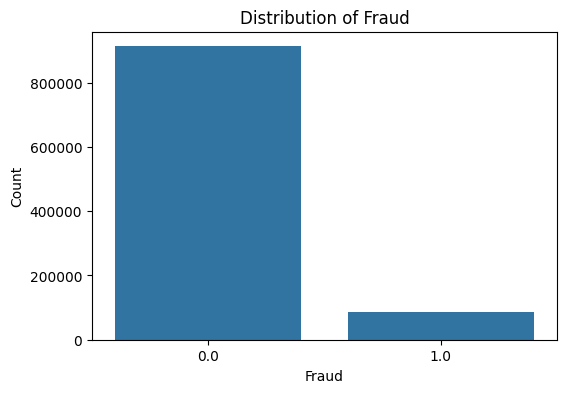

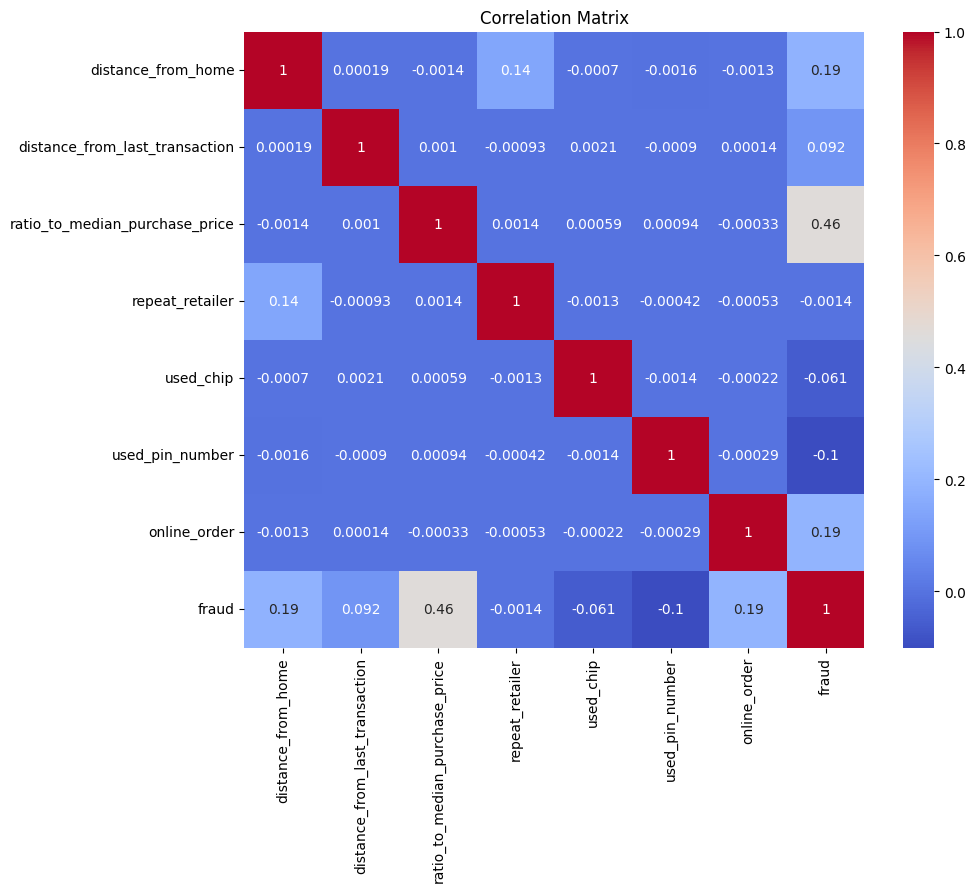

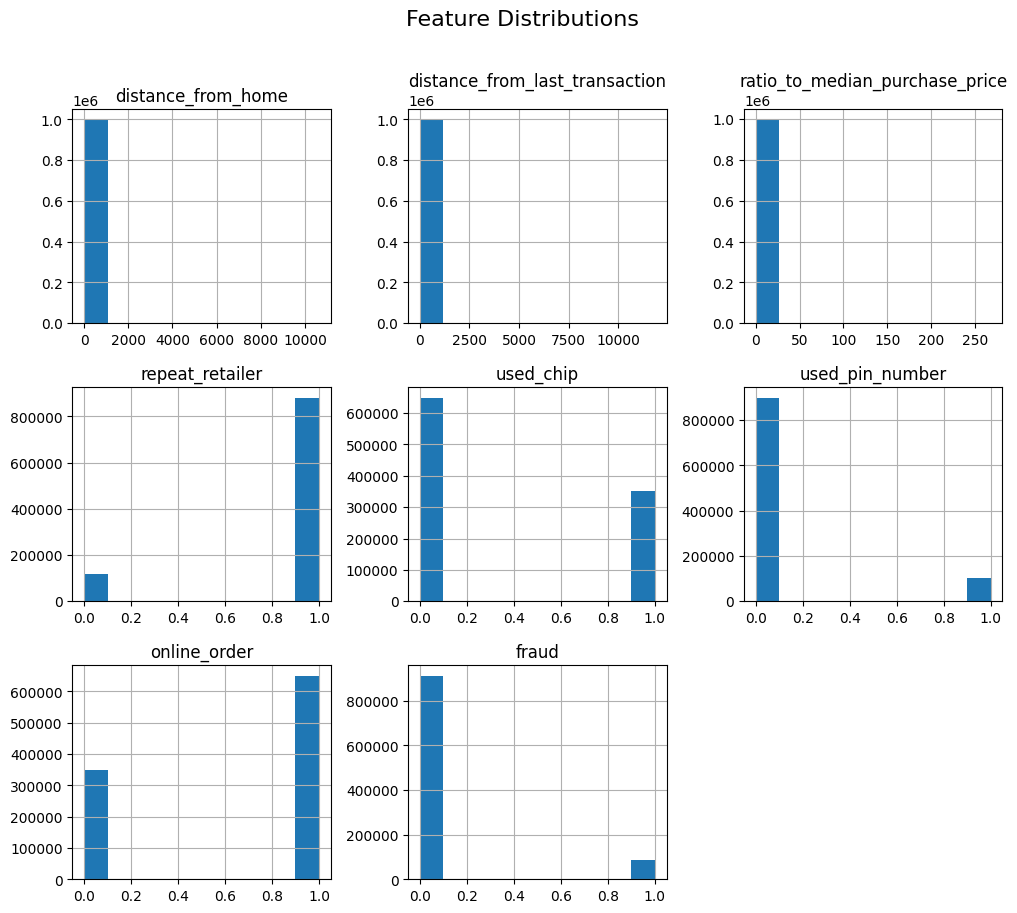

Train set size: 600000
Dev set size: 200000
Test set size: 200000
Epoch [10/100], Train Loss: 0.0080, Dev Loss: 0.0074
Epoch [20/100], Train Loss: 0.0071, Dev Loss: 0.0054
Epoch [30/100], Train Loss: 0.0001, Dev Loss: 0.0059
Epoch [40/100], Train Loss: 0.0000, Dev Loss: 0.0043
Epoch [50/100], Train Loss: 0.0000, Dev Loss: 0.0036
Epoch [60/100], Train Loss: 0.0000, Dev Loss: 0.0068
Epoch [70/100], Train Loss: 0.0000, Dev Loss: 0.0043
Epoch [80/100], Train Loss: 0.0000, Dev Loss: 0.0044
Epoch [90/100], Train Loss: 0.0000, Dev Loss: 0.0048
Epoch [100/100], Train Loss: 0.0000, Dev Loss: 0.0068
Test Accuracy: 99.74%
Single Prediction Prob: 3.906477286363952e-05
Single Prediction Class: 0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Step 1: Exploratory Data Analysis (EDA)

# Loading dataset
data = pd.read_csv("/content/card_transdata.csv")

print("Head of the dataset:")
print(data.head())
print("\nDataset info:")
print(data.info())
print("\nStatistical summary:")
print(data.describe())

# Check for missing values
# (Not necessary for this but just to illustrate that there should be no NaNs while running)
print("\nMissing values in each column:")
print(data.isnull().sum())

# Visualizations of the data
# Distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='fraud', data=data)
plt.title("Distribution of Fraud")
plt.xlabel("Fraud")
plt.ylabel("Count")
plt.show()

# Visualization: Correlation matrix heatmap
plt.figure(figsize=(10,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Visualization: Histograms for all features
data.hist(figsize=(12,10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


# Data Preprocessing and Creating a Custom Dataset

# Creating a custom PyTorch Dataset
class CardDataset(Dataset):
    def __init__(self, df):
        # Extract features and target
        X = df.drop('fraud', axis=1).values
        y = df['fraud'].values

        # Convert to float32 for PyTorch
        self.X = X.astype(np.float32)
        self.y = y.astype(np.float32).reshape(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create a dataset from the loaded DataFrame
card_dataset = CardDataset(data)


# Step 2: Perform a Train-Dev-Test Split


# We'll split: 80% for train+dev, 20% for test; then split the 80% into 75% train and 25% dev
# (resulting in roughly 60% train, 20% dev, 20% test)
total_size = len(card_dataset)
test_size = int(0.2 * total_size)
train_dev_size = total_size - test_size

train_dev_dataset, test_dataset = random_split(card_dataset, [train_dev_size, test_size])

# 25% of the 80% = 20% total
dev_size = int(0.25 * train_dev_size)
train_size = train_dev_size - dev_size
train_dataset, dev_dataset = random_split(train_dev_dataset, [train_size, dev_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
dev_loader   = DataLoader(dev_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train set size: {len(train_dataset)}")
print(f"Dev set size: {len(dev_dataset)}")
print(f"Test set size: {len(test_dataset)}")


# Extra Step Added: Normalization of Inputs

# Extract the features and scale them, then update the dataset.
all_X = data.drop('fraud', axis=1).values.astype(np.float32)
all_y = data['fraud'].values.astype(np.float32).reshape(-1, 1)

scaler = StandardScaler()
all_X_scaled = scaler.fit_transform(all_X)

# Update the dataset's features with the scaled data.
card_dataset.X = all_X_scaled

# Recreate the splits to ensure consistency after normalization.
train_dev_dataset, test_dataset = random_split(card_dataset, [train_dev_size, test_size])
train_dataset, dev_dataset = random_split(train_dev_dataset, [train_size, dev_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
dev_loader   = DataLoader(dev_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Step 3: Define the MLP Model and Implement Forward Propagation

class MLP(nn.Module):
    # The input dimension is dynamically set based on the dataset (number of features)
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(input_dim, 10)
        # Activation function for the first hidden layer
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(10, 8)
        # Activation function for the second hidden layer
        self.act2 = nn.ReLU()
        self.hidden3 = nn.Linear(8, 1)
        # Sigmoid activation for the output layer (for binary classification)
        self.act3 = nn.Sigmoid()

    def forward(self, X):
        # Forward propagation steps:
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        return X

# Initializing model using the number of input features from the dataset
model = MLP(input_dim=data.drop('fraud', axis=1).shape[1])


# Step 4: Cost Function
# Using Binary Cross Entropy Loss as our cost function.
criterion = nn.BCELoss()


# Step 5: Implementing Gradient Descent to Train the Model
# Optimizer: using SGD with momentum
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

def train_model(train_dl, dev_dl, model, epochs=100):
    for epoch in range(epochs):
      # Setting model to training mode
        model.train()
        for i, (inputs, targets) in enumerate(train_dl):
            # Clearing gradients from previous step
            optimizer.zero_grad()
            # Forward propagation
            outputs = model(inputs)
            # Cost
            loss = criterion(outputs, targets)
            # Backward propagation (gradient computation)
            loss.backward()
            # Update params (Mini-Batch)
            optimizer.step()

        # Evaluating on dev set every epoch
        model.eval()
        dev_losses = []
        with torch.no_grad():
            for inputs_dev, targets_dev in dev_dl:
                dev_outputs = model(inputs_dev)
                dev_loss = criterion(dev_outputs, targets_dev)
                dev_losses.append(dev_loss.item())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Dev Loss: {np.mean(dev_losses):.4f}")

# Step 6: Evaluate and Present the Results Using the Test Set
def evaluate_model(dl, model):
    predictions, actuals = [], []
    model.eval()
    with torch.no_grad():
        for inputs, targets in dl:
            outputs = model(inputs)
            # Converting probs to binary predictions (0 or 1)
            pred = (outputs >= 0.5).float()
            predictions.append(pred.detach().numpy())
            actuals.append(targets.detach().numpy())

    predictions = np.vstack(predictions)
    actuals = np.vstack(actuals)
    acc = accuracy_score(actuals, predictions)
    return acc


# Extra Step Added: Single Prediction Example

# This shows how to make a prediction on a single example from the test set.
def single_prediction_example(test_dataset, model):

    inputs_single, _ = test_dataset[0]
    with torch.no_grad():
      # Converting input sample to a PyTorch tensor and passing it through model.
      # Model then outputs a probability for the sample belonging to the positive class.
        yhat_single = model(torch.tensor(inputs_single))
    # Print predicted probability (a value between 0 and 1).
    print("Single Prediction Prob:", yhat_single.item())
    # If prob is 0.5+, we classify it as 1, else, it's 0.
    print("Single Prediction Class:", int(yhat_single.item() >= 0.5))


# Step 7: Train the Model and Evaluate on Test Data
train_model(train_loader, dev_loader, model, epochs=100)

test_acc = evaluate_model(test_loader, model)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Run a single prediction example
single_prediction_example(test_dataset, model)


## Some Observations Made:

From my exploratory data analysis, I have took note that the dataset info confirms there are no missing values, which simplifies preprocessing. The stat summary also reveals that features such as distance_from_home have a high variance, while binary features like used_pin_number and online_order are limited to values of 0 or 1. My correlation heatmap then shows that distance_from_home is strongly correlated with fraud, suggesting that transactions made far from home are more suspicious. On the other hand, used_pin_number illustrates a weaker correlation with fraud. This shows it may be less useful in predicting fraudulent behavior. I have attached graphs during my EDA that illustrate these correlations which makes it clear that some features have a stronger influence on the likelihood of fraud than others. I then trained the neural network using mini-batch gradient descent with a batch size of 32, allowing the model to update its parameters using small groups of samples instead of the entire dataset at once, just like before.The training results show a rapid decline in cost. It yields from 0.0080 at epoch 10 to nearly 0 by epoch 50. It ends with the final test accuracy of 99.74%. These results confirm that the neural network is capturing the underlying patterns in the data very well.



##Task 3 (10 points):

In task 2 describe how you selected the hyperparameters. What was the
rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use
an optimization algorithm? Why or why not?

## Choosing Hyperparameters and other Details


In Task 2, I chose the hyperparameters based on standard practices and by testing on a validation set and also on the reliance of building a neural network from the site I have referened before(https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/).

I started by choosing a learning rate of 0.01(which they have used as well) because it allowed the model to update its weights gradually and steadily without making sudden, unstable changes. I also continued to use the same batch size as well which is 32. I also chose to use stochastic gradient descent with momentum as the optimizer since it tends to converge faster and more reliably than plain gradient descent. This is true especially when working with a dataset containing over 10,000 records as I have read up upon (https://datascience.stackexchange.com/questions/36450/what-is-the-difference-between-gradient-descent-and-stochastic-gradient-descent). I did not introduce extra regularization methods like dropout or weight decay because my initial tests did not show overfitting. The training and test performances were in balance for the duration of the run. I just relied on input normalization to help the model learn more smoothly and avoid instability during training. If there were signs of overfitting, I would have considered adding techniques such as dropout. With this combination of a consistent learning rate, good optimizer, and input normalization, the network has shown a good balance between performance and simplicity.

##Task 4 (100 points):

Create another baseline model (can be any model we covered so far except
a deep learning model). Using the same training data (as above) train your model and evaluate
results using the test set. Compare the results of both models (the Neural Network and the
baseline model). What are the reasons for one model performing better (or not) than the
other? Explain.

In [ ]:
#Logistic Regression:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Load the Dataset

data = pd.read_csv("/content/card_transdata.csv")

# Check Shape
print("Data shape:", data.shape)


# Separate features and target
X = data.drop("fraud", axis=1).values
y = data["fraud"].values


# Train-Dev-Test Split

# First: 80% for Train+Dev, 20% for Test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Then: of the remaining 80%, split 25% as Dev, 75% as Train
X_train, X_dev, y_train, y_dev = train_test_split(
     # 25% of 80% => 20% overall
    X_temp, y_temp, test_size=0.25, random_state=42
)

print(f"Train set size: {X_train.shape[0]}")
print(f"Dev set size: {X_dev.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Data Normalization

# Using the same approach as your neural network code to ensure fairness
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)


# Baseline Model Being Used For Comparison: Logistic Regression

# Initialize and train the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Evaluating on validation set
dev_predictions = log_reg_model.predict(X_dev_scaled)
dev_accuracy = accuracy_score(y_dev, dev_predictions)
print(f"Dev Accuracy (Logistic Regression): {dev_accuracy * 100:.2f}%")

# Evaluate on the test set
test_predictions = log_reg_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy (Logistic Regression): {test_accuracy * 100:.2f}%")


Data shape: (1000000, 8)
Train set size: 600000
Dev set size: 200000
Test set size: 200000
Dev Accuracy (Logistic Regression): 95.88%
Test Accuracy (Logistic Regression): 95.88%


The neural network outperforms the logistic regression model. The neural network achieved a test accuracy of 99.74%, while logistic regression only reached about 95.88%.

The main reason for the neural network's better performance is its ability to capture complex and non-linear relationships in the data. Logistic regression is a linear model which means that it can only create a straight-line decision boundary, which might not be enough when the patterns in the fraud detection data are more complicated. With the neural network, it contains hidden layers and non-linear activation functions which include ReLU and Sigmoid, which can help with learning more complex decision boundaries.

The neural network benefits from having a large amount of training data and the mini-batch gradient descent method, which helps it converge efficiently and avoid noisy updates. The logistic regression model, while simpler and faster to train, does not have the flexibility to capture the subtleties in the data as well as the neural network does.

Based on the results of the two, it is shown that the neural network's performance is likely due to its higher capacity for modeling non-linear relationships and interactions between features, which are critical in a large or complex datasets like fraud detection.